# Missing Values Analysis and Imputation
 
For this we will use the Pima indians diabetes dataset

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [269]:
movies = pd.read_csv("../../Data/Movies_v1.csv")
movies.head()

,movie_id,original_title,revenue,budget,popularity,actors_cnt,original_language,language_en,language_fr,language_es,...,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
0,1,Hot Tub Time Machine 2,12314651.0,14000000,6.575393,24,en,1,0,0,...,2.0,2.0,33274115.0,0.0,30658668.0,0.0,101192633.0,1.0,12314651.0,0.0
1,2,The Princess Diaries 2: Royal Engagement,95149435.0,40000000,8.248895,20,en,1,0,0,...,2.0,2.0,113707282.0,3.0,48418160.0,0.0,118162119.0,2.0,NaN,0.0
2,3,Whiplash,13092000.0,3300000,64.299990,51,en,1,0,0,...,2.0,1.0,13092000.0,0.0,13092000.0,0.0,43944921.8,2.0,31450731.5,1.0
3,4,Kahaani,16000000.0,1200000,3.174936,7,hi,0,0,0,...,0.0,0.0,16000000.0,0.0,NaN,0.0,16000000.0,0.0,NaN,0.0
4,5,????,3923970.0,0,1.148070,4,ko,0,0,0,...,0.0,2.0,3923970.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [270]:
# Filter the movies with unknown revenue ???
movies = movies[movies.revenue > 0]


In [271]:

###   Exploratory data analysis


In [272]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   movie_id                           3000 non-null   int64  
 1   original_title                     3000 non-null   object 
 2   revenue                            3000 non-null   float64
 3   budget                             3000 non-null   int64  
 4   popularity                         3000 non-null   float64
 5   actors_cnt                         3000 non-null   int64  
 6   original_language                  3000 non-null   object 
 7   language_en                        3000 non-null   int64  
 8   language_fr                        3000 non-null   int64  
 9   language_es                        3000 non-null   int64  
 10  language_de                        3000 non-null   int64  
 11  language_ru                        3000 non-null   int64

In [273]:
### 1. Describe the data with descriptive statistics (use concentration and dispersion indices)  

movies.describe()


,movie_id,revenue,budget,popularity,actors_cnt,language_en,language_fr,language_es,language_de,language_ru,...,actor2_movies_5y,actor2_gender,all_directors_avg_revenue,all_directors_avg_blockbusters,all_directors_avg_revenue_5y,all_directors_avg_blockbusters_5y,all_producers_avg_revenue,all_producers_avg_blockbusters,all_producers_avg_revenue_5y,all_producers_avg_blockbusters_5y
count,3000.000000,3.000000e+03,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,...,2926.000000,2926.000000,2.984000e+03,2984.000000,9.290000e+02,2984.000000,2.373000e+03,2373.000000,1.120000e+03,2373.000000
mean,1500.500000,6.672585e+07,2.253133e+07,8.463274,20.603667,0.858333,0.026000,0.014333,0.00600,0.015667,...,1.048189,1.421053,6.568883e+07,0.837466,1.067337e+08,0.141756,8.013363e+07,1.327012,1.372566e+08,0.212389
std,866.169729,1.375323e+08,3.702609e+07,12.104000,16.629635,0.348766,0.159162,0.118881,0.07724,0.124203,...,1.467856,0.700491,1.116238e+08,1.474123,1.885529e+08,0.436761,1.126998e+08,2.277006,1.981440e+08,0.573059
min,1.000000,1.000000e+00,0.000000e+00,0.000001,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000e+00,0.000000,3.000000e+00,0.000000,3.000000e+00,0.000000,1.250000e+02,0.000000
25%,750.750000,2.379808e+06,0.000000e+00,4.018053,11.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,1.000000,4.233892e+06,0.000000,1.982505e+06,0.000000,1.056946e+07,0.000000,1.591341e+07,0.000000
50%,1500.500000,1.680707e+07,8.000000e+06,7.374861,16.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,2.000000,2.503072e+07,0.000000,2.925298e+07,0.000000,4.461462e+07,0.000000,6.716827e+07,0.000000
75%,2250.250000,6.891920e+07,2.900000e+07,10.890983,24.000000,1.000000,0.000000,0.000000,0.00000,0.000000,...,2.000000,2.000000,7.862851e+07,1.000000,1.283883e+08,0.000000,1.055965e+08,2.000000,1.616300e+08,0.000000
max,3000.000000,1.519558e+09,3.800000e+08,294.337037,156.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,10.000000,2.000000,1.462481e+09,10.000000,1.405404e+09,3.000000,1.055295e+09,20.000000,1.117471e+09,4.000000


In [274]:
### 2. Graphs depicting the behavior of each variable.

import sweetviz as sv

#analyzing the dataset
advert_report = sv.analyze(movies)
#display the report
advert_report.show_html ('movies_eda_before_cleansing.html')



:FEATURES DONE:                    |█████████████████████| [100%]   00:16  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:07  -> (00:00 left)


Creating Associations graph... DONE!
Report movies_eda_before_cleansing.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


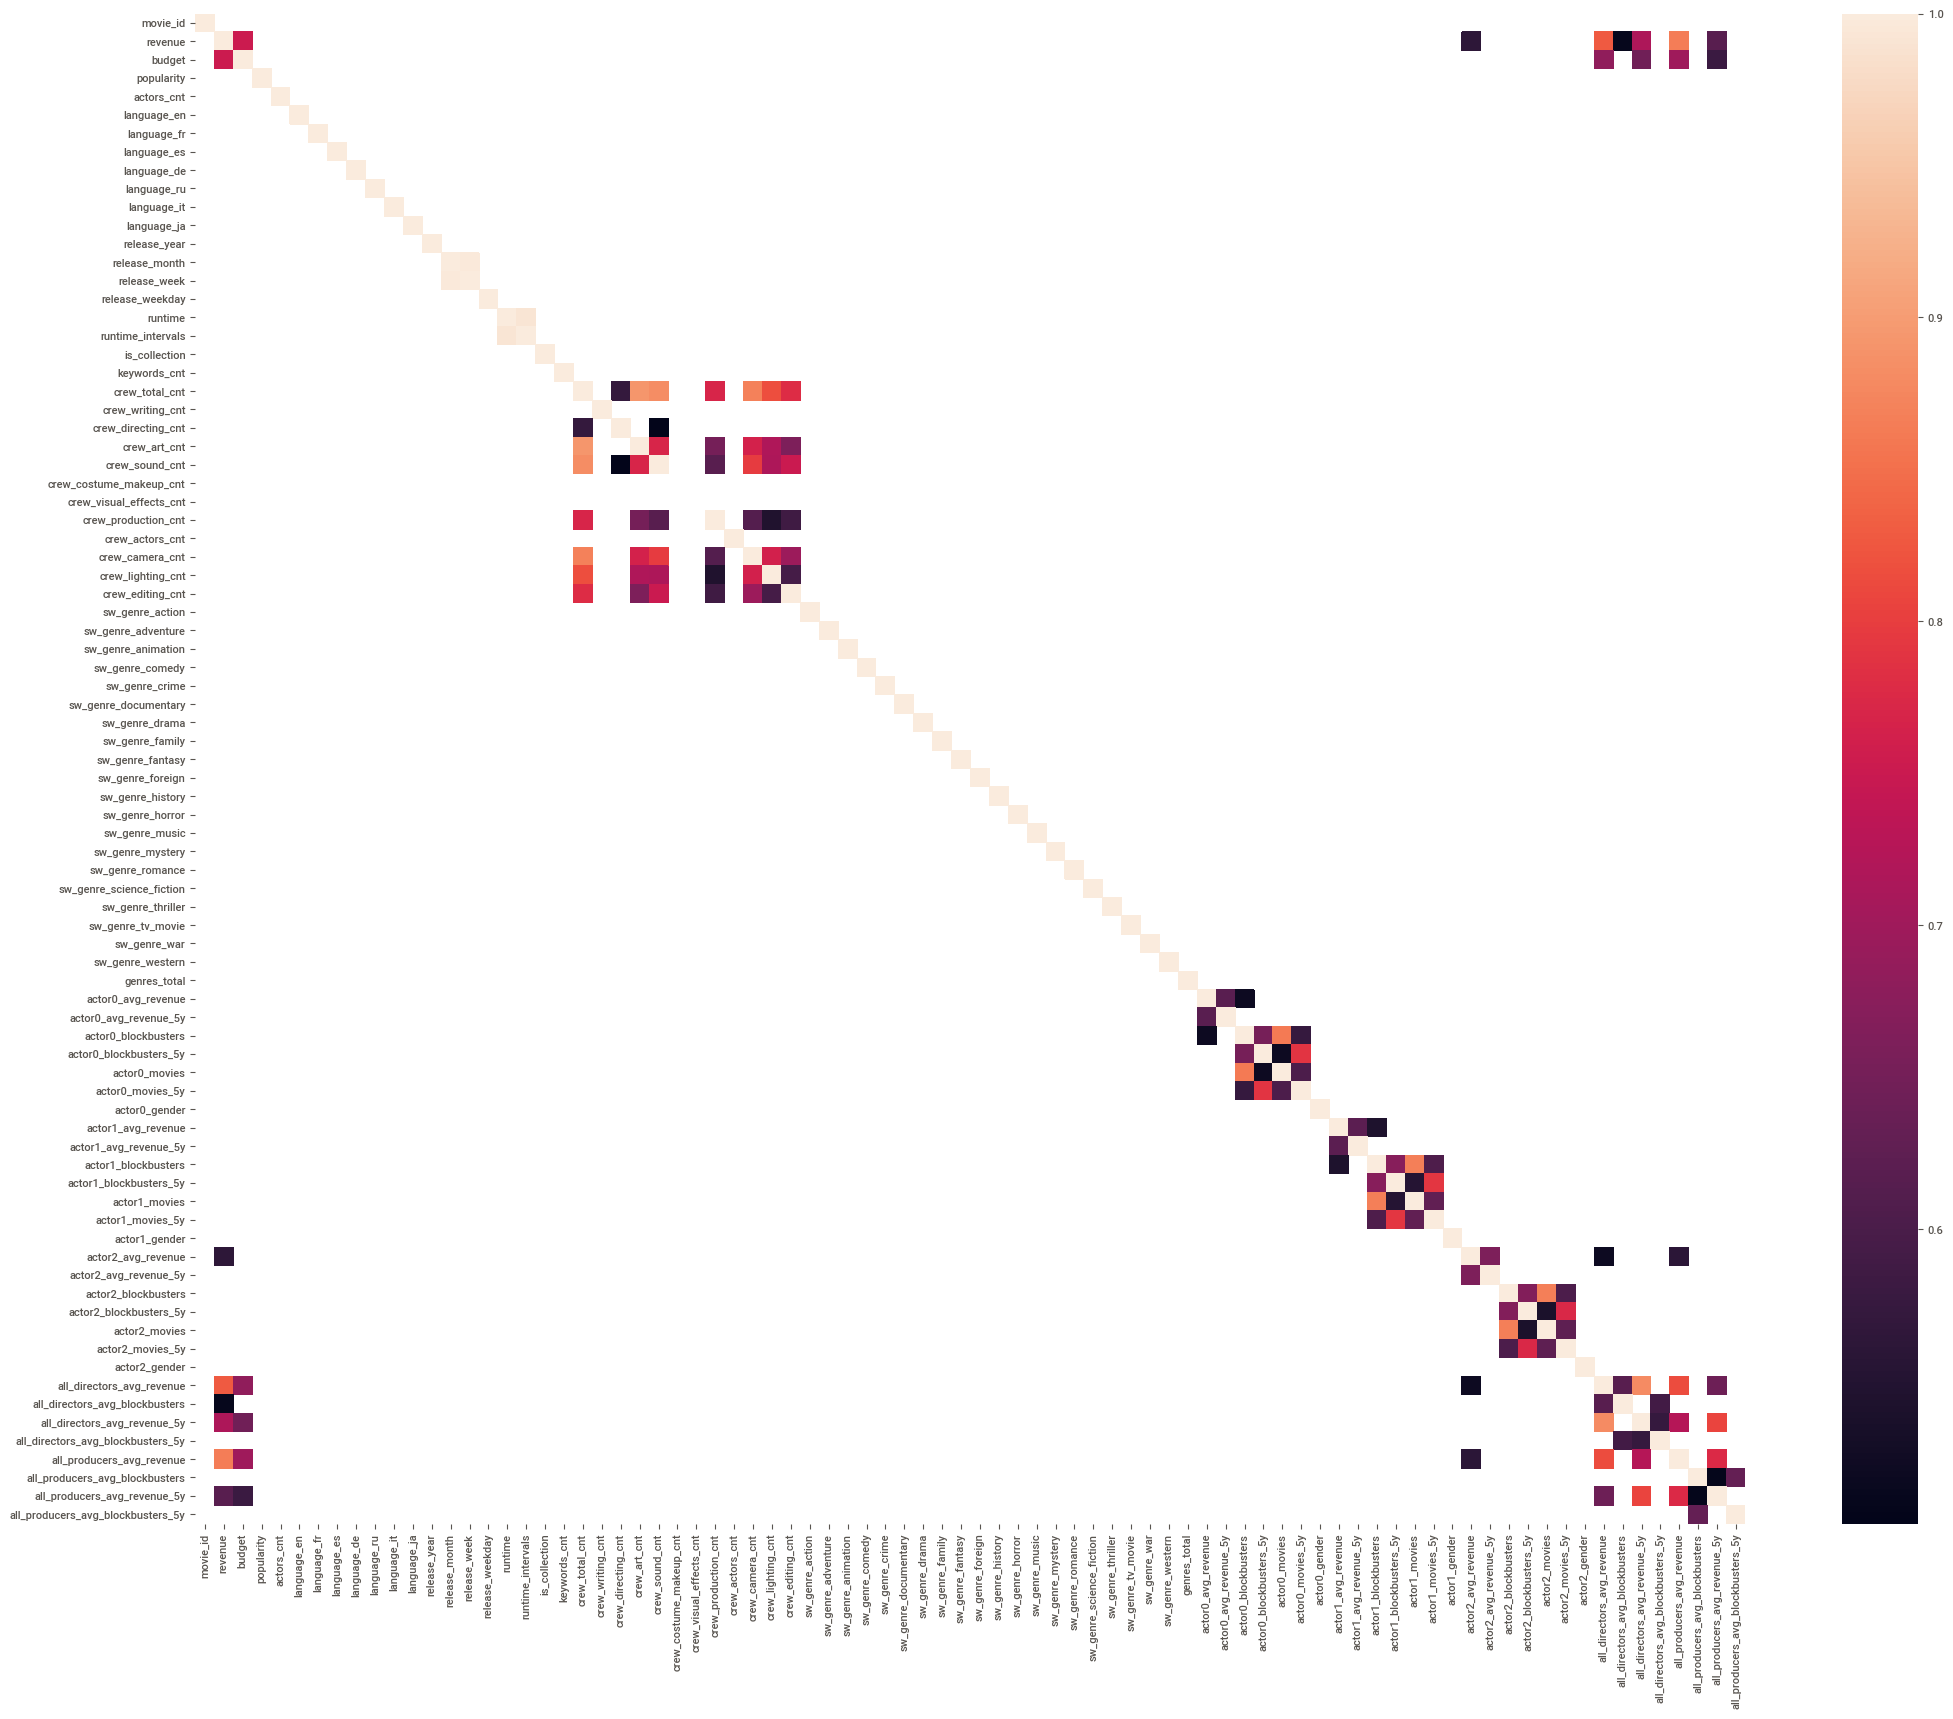

In [275]:
### 3. Create a correlation matrix and present it in a graph with seaborn pairplot
###sns.pairplot(movies,dropna=False,kind="scatter") 
### Takes a lot of time to create an image of all corellations. The image saved as DataScience/stats/Statistics_excercise/


### 3. Create a correlation matrix and present it in a graph with seaborn heatmap
movies_corr_matrix = movies.corr()
kot = movies_corr_matrix[abs(movies_corr_matrix)>=.5]
plt.figure(figsize=(25,20))
sns.heatmap(kot)


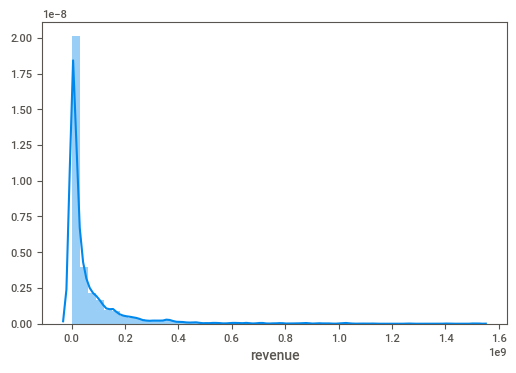

In [276]:
#TODO: find better distribution plot

### 4. Describe the target variable (revenue) - how is it distributed? 
### Are there categories that show a large difference in the distribution of the target variable?

sns.distplot(movies.revenue, kde="fit")


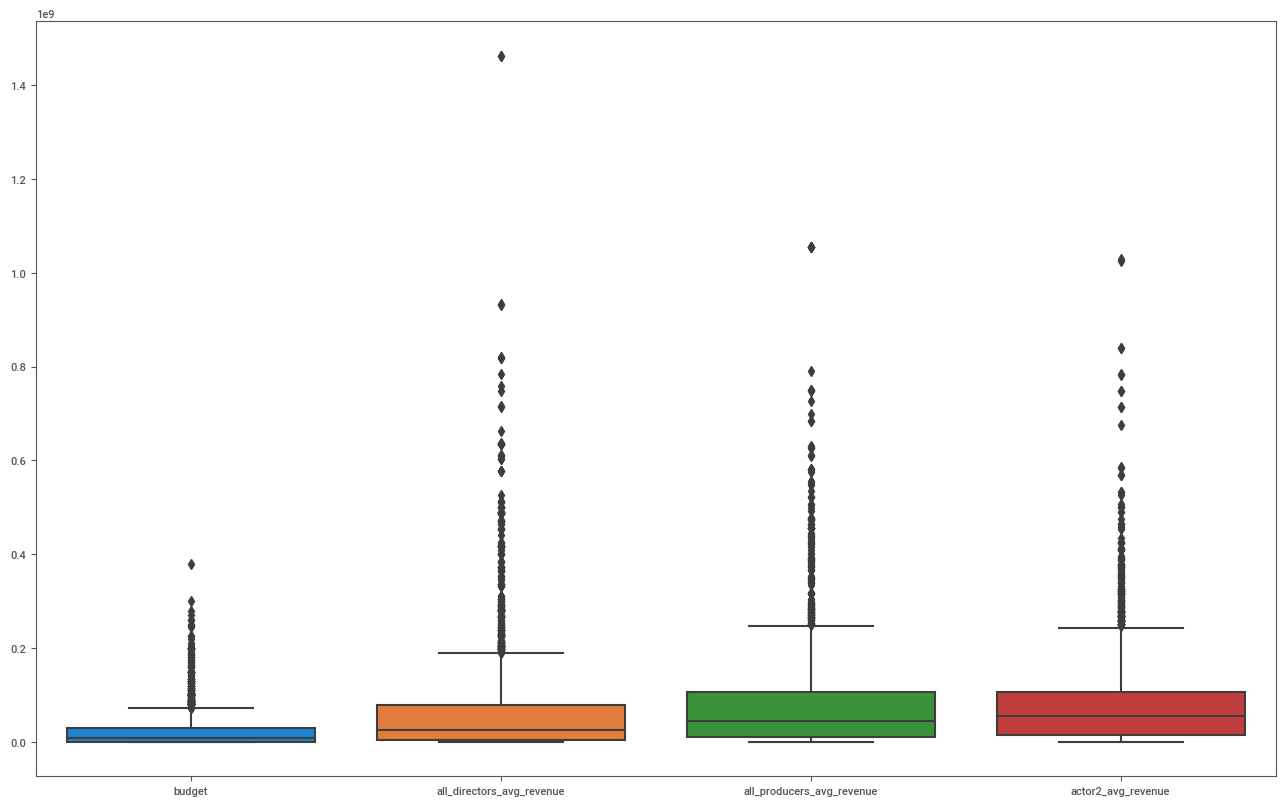

In [277]:
### 5. Create graphs that can help you check for extreme data. Describe them.

movies_f = movies[['budget', 'all_directors_avg_revenue','all_producers_avg_revenue', 'actor2_avg_revenue']].copy()

plt.figure(figsize=(16, 10))
sns.boxplot(data=movies_f)

### There is a huge difference between the blockbusters and average movies in budgets, revenues, crew etc.

In [278]:
### 6. Describe the missing data: Which variables have missing data? Some?

na_variables = movies.isna().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(na_variables)

### There is a small amount of records (~20) with missing data in "runtime", "crew_..." and "sw_genres_..."  variables.
### There are more lack of data in calculated variables like "actor0_avg_revenue" and "all_directors_avg_revenue_5y".
### It seems normal because not all director or actor prticipated in movie that made revenue, in special during last 5 years
### All NaNs will be replaced with 0.    


movie_id                                0
original_title                          0
revenue                                 0
budget                                  0
popularity                              0
actors_cnt                              0
original_language                       0
language_en                             0
language_fr                             0
language_es                             0
language_de                             0
language_ru                             0
language_it                             0
language_ja                             0
release_date                            0
release_year                            0
release_month                           0
release_week                            0
release_weekday                         0
runtime                                 2
runtime_intervals                       2
runtime_cat                             0
is_collection                           0
keywords_cnt                      

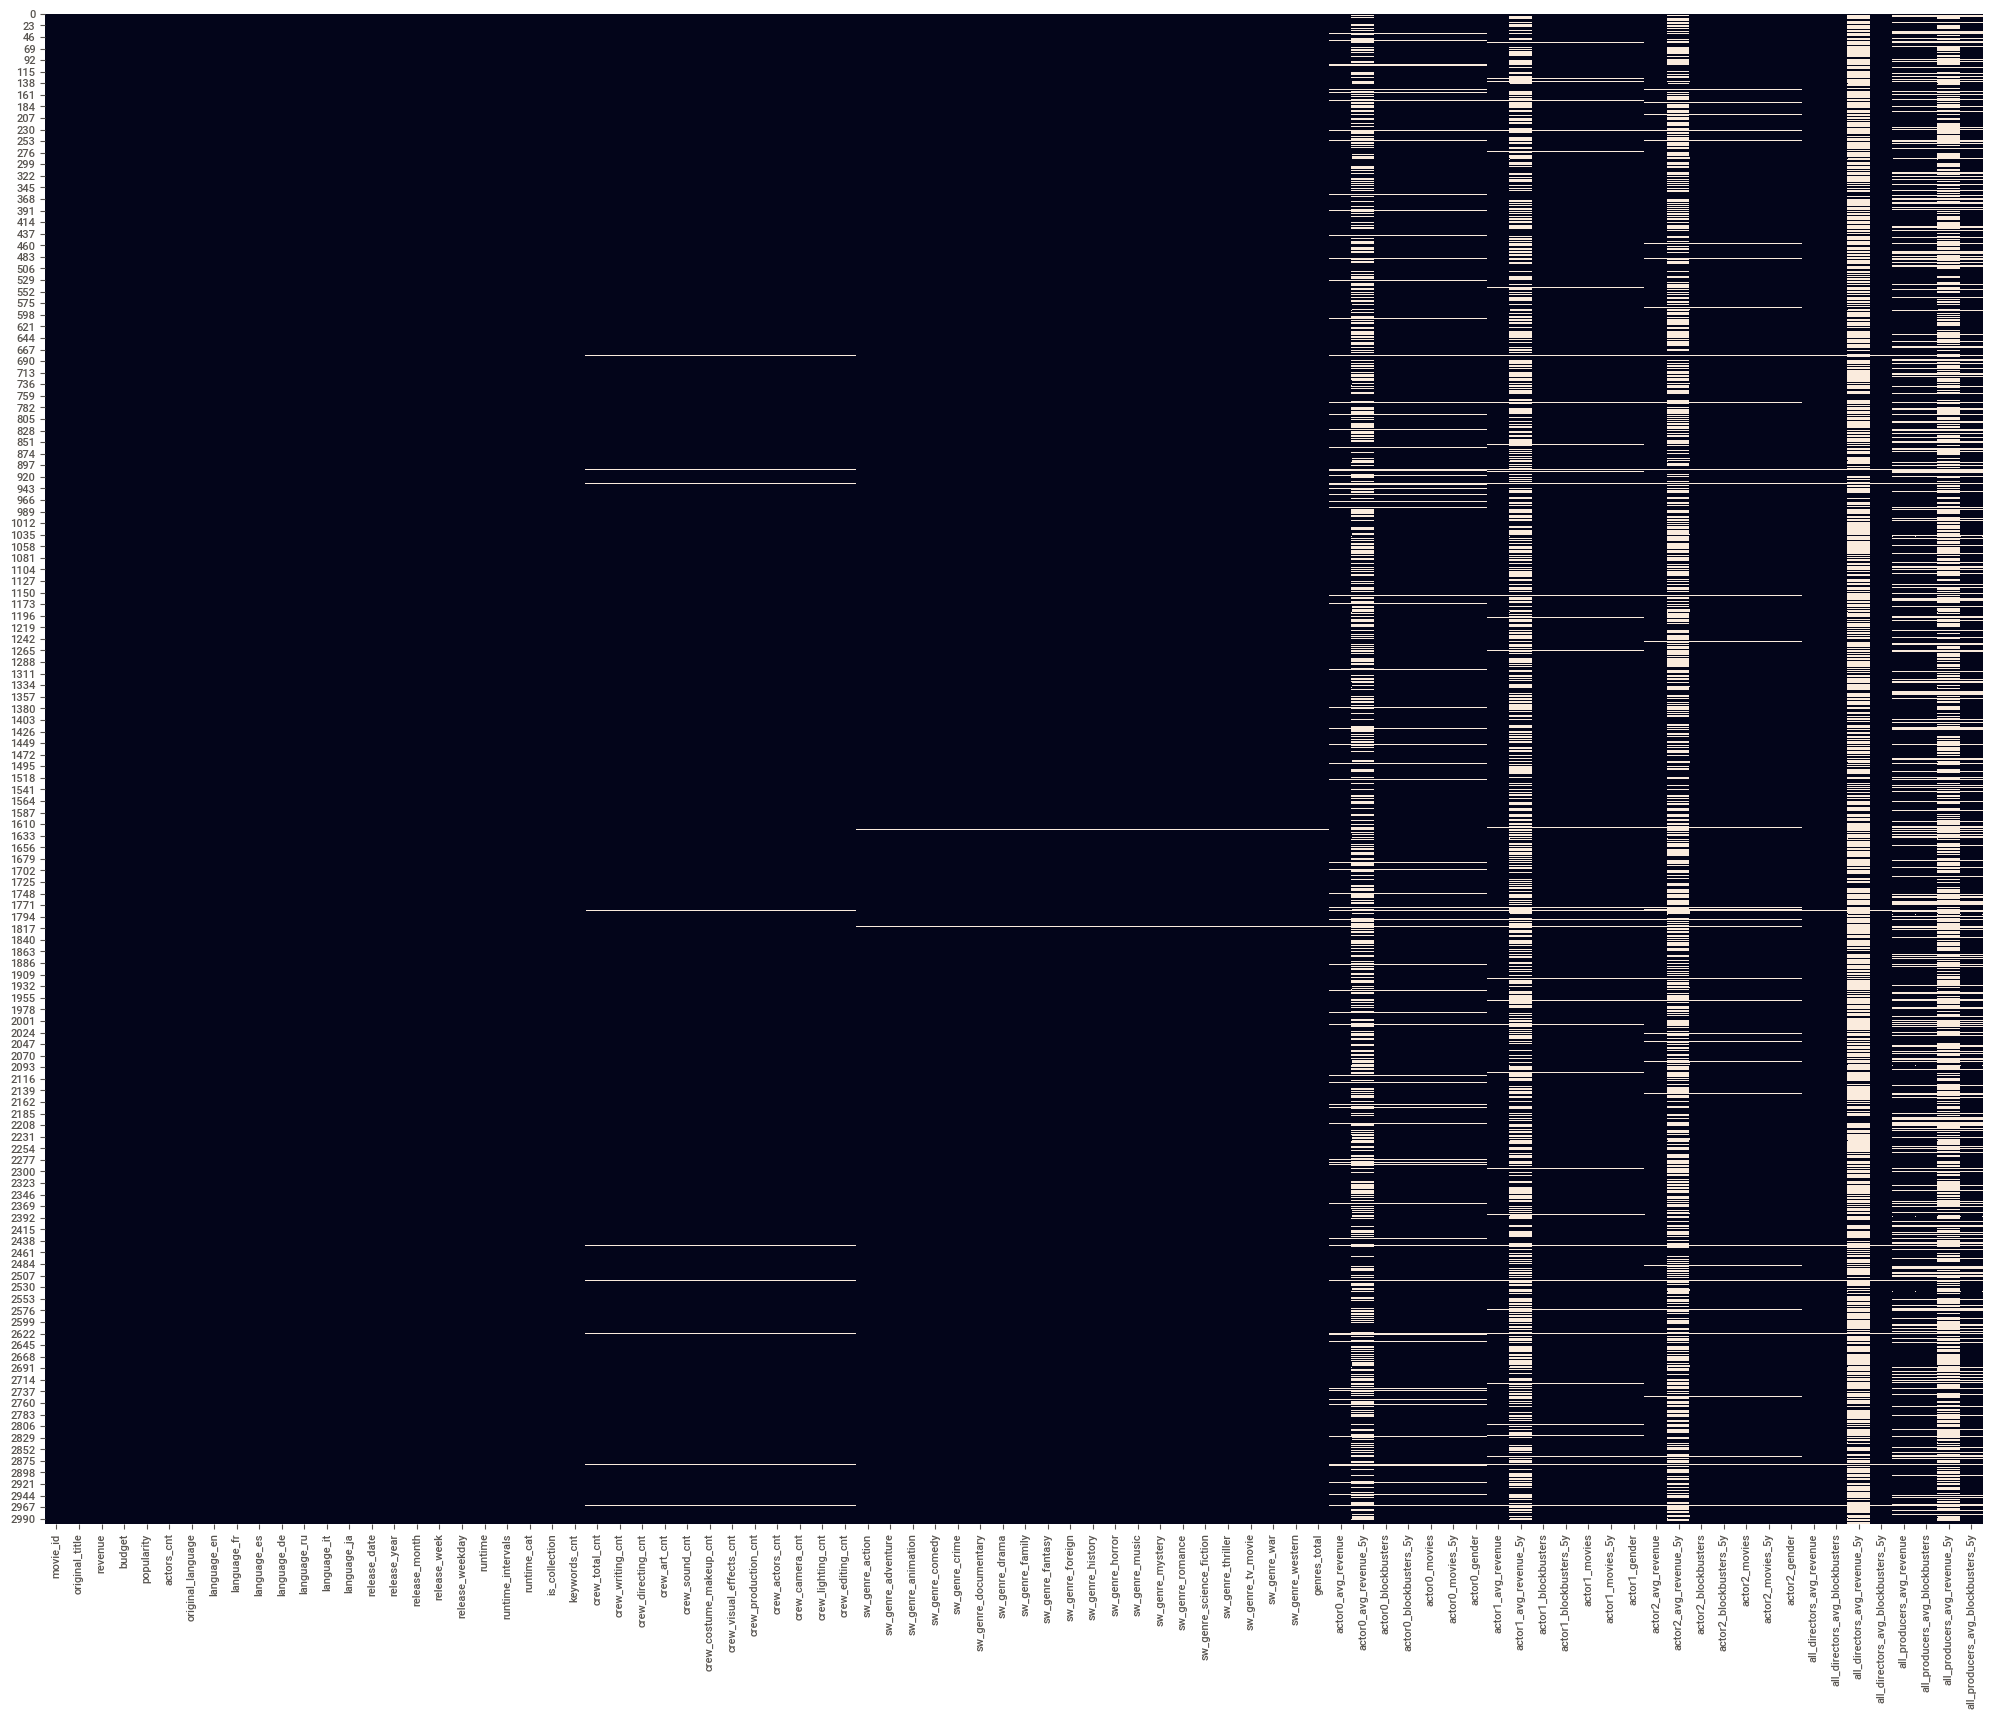

In [279]:
### 7. Create a matrix of gaps (create a dataframe with the same dimensions from the source table and cells that are missing put a value of one and those that have data have a zero value). 
### Show the matrix in the heatmap graph.

plt.figure(figsize=(25,20))
sns.heatmap(movies.isnull(), cbar=False)



In [280]:



###   Extreme data




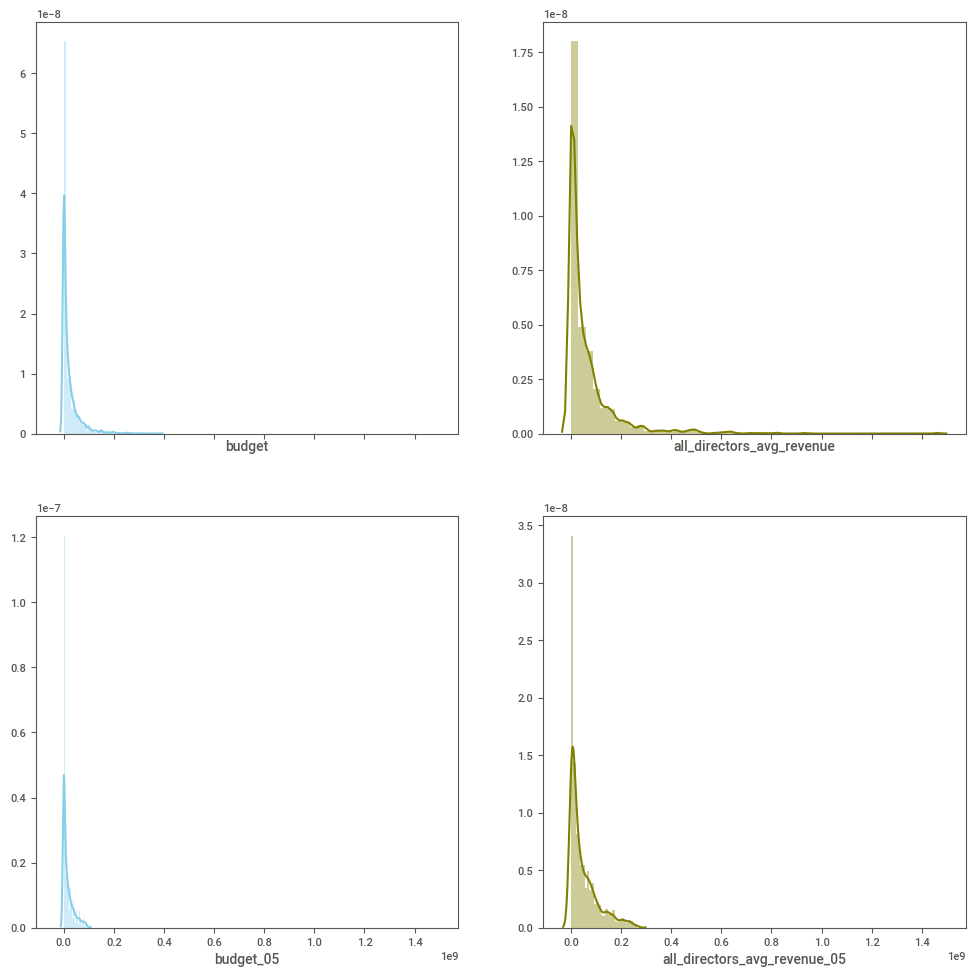

In [281]:
###### 1. In variables where extreme values are found, check the distribution of the variable with and without the extreme values. 
### Does the distribution change?


### Distribution of original budget and 'all directors average revenue'
### Distribution of budget and 'all directors average revenue' without outliers

movies_t = movies[['revenue', 'budget', 'all_directors_avg_revenue']].copy()
movies_t.insert(2, "budget_05", movies.budget[movies.budget.between(movies.budget.quantile(.05), movies.budget.quantile(.95))], True) 
movies_t.insert(3, "all_directors_avg_revenue_05", movies.all_directors_avg_revenue[movies.all_directors_avg_revenue.between(movies.all_directors_avg_revenue.quantile(.05), movies.all_directors_avg_revenue.quantile(.95))], True) 

f, axes = plt.subplots(2, 2, figsize=(12, 12), sharex=True)
sns.distplot(movies_t.budget , color="skyblue", ax=axes[0,0])
sns.distplot(movies_t.all_directors_avg_revenue , color="olive", ax=axes[0,1])
sns.distplot(movies_t.budget_05 , color="skyblue", ax=axes[1,0])
sns.distplot(movies_t.all_directors_avg_revenue_05 , color="olive", ax=axes[1,1])



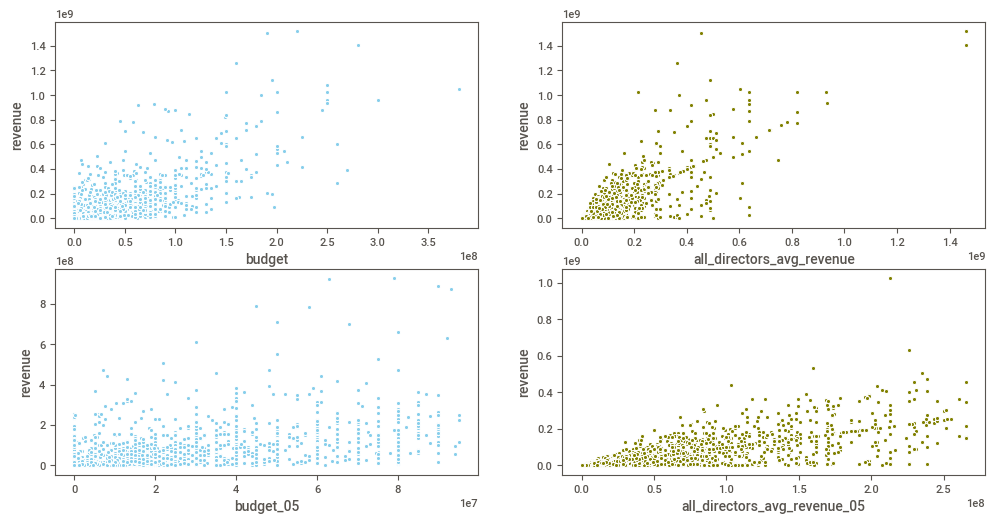

In [282]:
## 2. Create a scatter graph with the variables in the previous question in X and the target variable in Y. 
### Do extreme values in variable X affect the behavior of variable Y? Do you see differences with or without extreme values?

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.scatterplot(data = movies_t, x="budget", y="revenue" , color="skyblue", ax=axes[0,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue", y="revenue" , color="olive", ax=axes[0,1])
sns.scatterplot(data = movies_t, x="budget_05", y="revenue" , color="skyblue", ax=axes[1,0])
sns.scatterplot(data = movies_t, x="all_directors_avg_revenue_05", y="revenue" , color="olive", ax=axes[1,1])

In [283]:
### 3. In what variables would you delete the extreme values? How would you delete them? Necrosis.

### ???


In [284]:
### 4. Act on the data according to what you defined in the previous question.



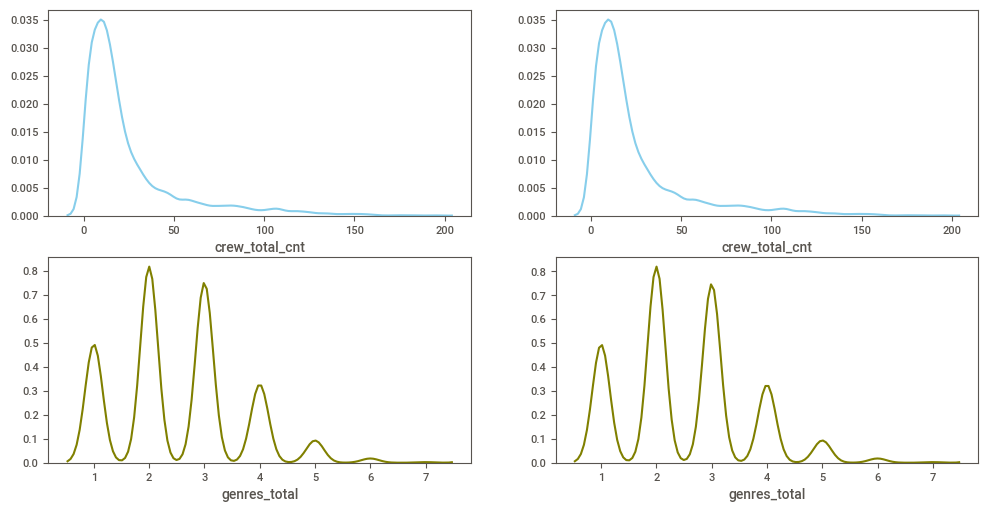

In [285]:
### Missing data
### For each variable with missing data, you will see the distribution of other variables with or without missing. 
### Use the missing matrix you created in part 2, question 7 for the missing / no indication. 
### For the distribution, use a histogram or density graph with category / color as indicated.

movies_nan_free = movies[['crew_total_cnt', 'genres_total']].copy()
movies_nan_free = movies_nan_free.dropna()
movies_nan_free.genres_total = movies_nan_free.genres_total.astype(int)

f, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=False)
sns.distplot(movies.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,0])
sns.distplot(movies_nan_free.crew_total_cnt, hist=False, color="skyblue", ax=axes[0,1])
sns.distplot(movies.genres_total, hist=False, color="olive", ax=axes[1,0])
sns.distplot(movies_nan_free.genres_total, hist=False, color="olive", ax=axes[1,1])

### 

In [287]:
movies = movies.dropna(subset=['crew_total_cnt','crew_writing_cnt','crew_directing_cnt','crew_art_cnt','crew_sound_cnt','crew_costume_makeup_cnt','crew_visual_effects_cnt','crew_production_cnt','crew_actors_cnt','crew_camera_cnt','crew_lighting_cnt','crew_editing_cnt'])
movies = movies.dropna(subset=['sw_genre_action','sw_genre_adventure','sw_genre_animation','sw_genre_comedy','sw_genre_crime','sw_genre_documentary','sw_genre_drama','sw_genre_family','sw_genre_fantasy','sw_genre_foreign','sw_genre_history','sw_genre_horror','sw_genre_music','sw_genre_mystery','sw_genre_romance','sw_genre_science_fiction','sw_genre_thriller','sw_genre_tv_movie','sw_genre_war','sw_genre_western','genres_total'])

movies = movies.fillna(0)



In [288]:


movies.original_language = pd.Categorical(movies.original_language)
movies.language_en = pd.Categorical(movies.language_en)
movies.language_fr = pd.Categorical(movies.language_fr)
movies.language_es = pd.Categorical(movies.language_es)
movies.language_de = pd.Categorical(movies.language_de)
movies.language_ru = pd.Categorical(movies.language_ru)
movies.language_it = pd.Categorical(movies.language_it)
movies.language_ja = pd.Categorical(movies.language_ja)
movies.runtime_intervals = pd.Categorical(movies.runtime_intervals)
movies.runtime_cat = pd.Categorical(movies.runtime_cat)
movies.is_collection = pd.Categorical(movies.is_collection)
movies.sw_genre_action = pd.Categorical(movies.sw_genre_action)
movies.sw_genre_adventure = pd.Categorical(movies.sw_genre_adventure)
movies.sw_genre_animation = pd.Categorical(movies.sw_genre_animation)
movies.sw_genre_comedy = pd.Categorical(movies.sw_genre_comedy)
movies.sw_genre_crime = pd.Categorical(movies.sw_genre_crime)
movies.sw_genre_documentary = pd.Categorical(movies.sw_genre_documentary)
movies.sw_genre_drama = pd.Categorical(movies.sw_genre_drama)
movies.sw_genre_family = pd.Categorical(movies.sw_genre_family)
movies.sw_genre_fantasy = pd.Categorical(movies.sw_genre_fantasy)
movies.sw_genre_foreign = pd.Categorical(movies.sw_genre_foreign)
movies.sw_genre_history = pd.Categorical(movies.sw_genre_history)
movies.sw_genre_horror = pd.Categorical(movies.sw_genre_horror)
movies.sw_genre_music = pd.Categorical(movies.sw_genre_music)
movies.sw_genre_mystery = pd.Categorical(movies.sw_genre_mystery)
movies.sw_genre_romance = pd.Categorical(movies.sw_genre_romance)
movies.sw_genre_science_fiction = pd.Categorical(movies.sw_genre_science_fiction)
movies.sw_genre_thriller = pd.Categorical(movies.sw_genre_thriller)
movies.sw_genre_tv_movie = pd.Categorical(movies.sw_genre_tv_movie)
movies.sw_genre_war = pd.Categorical(movies.sw_genre_war)
movies.sw_genre_western = pd.Categorical(movies.sw_genre_western)
movies.actor0_gender = pd.Categorical(movies.actor0_gender)
movies.actor1_gender = pd.Categorical(movies.actor1_gender)
movies.actor2_gender = pd.Categorical(movies.actor2_gender)

movies.release_year = movies.release_year.astype(int)
movies.release_month = movies.release_month.astype(int)
movies.release_week = movies.release_week.astype(int)
movies.release_weekday = movies.release_weekday.astype(int)
movies.runtime = movies.runtime.astype(int)
movies.crew_total_cnt = movies.crew_total_cnt.astype(int)
movies.crew_actors_cnt = movies.crew_actors_cnt.astype(int)
movies.crew_art_cnt = movies.crew_art_cnt.astype(int)
movies.crew_camera_cnt = movies.crew_camera_cnt.astype(int)
movies.crew_costume_makeup_cnt = movies.crew_costume_makeup_cnt.astype(int)
movies.crew_directing_cnt = movies.crew_directing_cnt.astype(int)
movies.crew_editing_cnt = movies.crew_editing_cnt.astype(int)
movies.crew_lighting_cnt = movies.crew_lighting_cnt.astype(int)
movies.crew_production_cnt = movies.crew_production_cnt.astype(int)
movies.crew_sound_cnt = movies.crew_sound_cnt.astype(int)
movies.crew_visual_effects_cnt = movies.crew_visual_effects_cnt.astype(int)
movies.crew_writing_cnt = movies.crew_writing_cnt.astype(int)
movies.genres_total = movies.genres_total.astype(int)
movies.actor0_movies = movies.actor0_movies.astype(int)
movies.actor0_movies_5y = movies.actor0_movies_5y.astype(int)
movies.actor0_blockbusters = movies.actor0_blockbusters.astype(int)
movies.actor0_blockbusters_5y = movies.actor0_blockbusters_5y.astype(int)
movies.actor1_movies = movies.actor1_movies.astype(int)
movies.actor1_movies_5y = movies.actor1_movies_5y.astype(int)
movies.actor1_blockbusters = movies.actor1_blockbusters.astype(int)
movies.actor1_blockbusters_5y = movies.actor1_blockbusters_5y.astype(int)
movies.actor2_movies = movies.actor2_movies.astype(int)
movies.actor2_movies_5y = movies.actor2_movies_5y.astype(int)
movies.actor2_blockbusters = movies.actor2_blockbusters.astype(int)
movies.actor2_blockbusters_5y = movies.actor2_blockbusters_5y.astype(int)
movies.all_directors_avg_blockbusters = movies.all_directors_avg_blockbusters.astype(int)
movies.all_directors_avg_blockbusters_5y = movies.all_directors_avg_blockbusters_5y.astype(int)
movies.all_producers_avg_blockbusters= movies.all_producers_avg_blockbusters.astype(int)
movies.all_producers_avg_blockbusters_5y = movies.all_producers_avg_blockbusters_5y.astype(int)

